In [ ]:
!pip install torch_snippets
!pip install pycocotools
!pip install git+git://github.com/waspinator/pycococreator.git@0.2.0
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html
!pip install pyyaml==5.1 pycocotools>=2.0.1

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
import os
from detectron2.utils.visualizer import ColorMode
import cv2
import pandas as pd
from torch_snippets import *

In [4]:
required_classes = 'person,dog,bird,elephant,Zebra'
required_classes = [c.lower() for c in required_classes.lower().split(',')]
classes = pd.read_csv('/content/Book1.csv', header=None)
classes.columns = ['class_name']
classes = classes[classes['class_name'].map(lambda x: x in required_classes)]
print(classes)

  class_name
0       bird
1     person
2      zebra
3        dog
4   elephant


In [5]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "/content/drive/MyDrive/Image_Segmentation_Detectron2/trained_model.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.25
predictor = DefaultPredictor(cfg)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


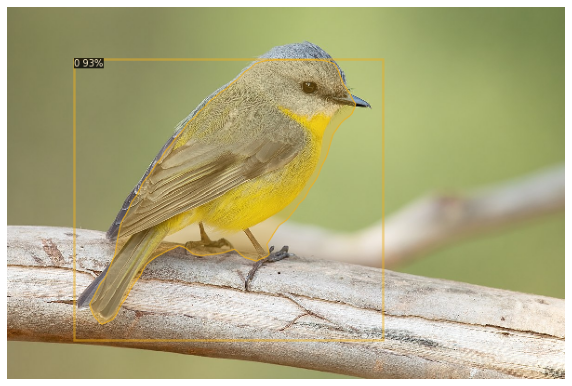

In [6]:
img=cv2.imread('/content/birdy.jpg')
outputs = predictor(img)
v = Visualizer(img[:, :, ::-1], scale=0.5, instance_mode=ColorMode.IMAGE_BW, )
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
show(out.get_image(), sz=10)

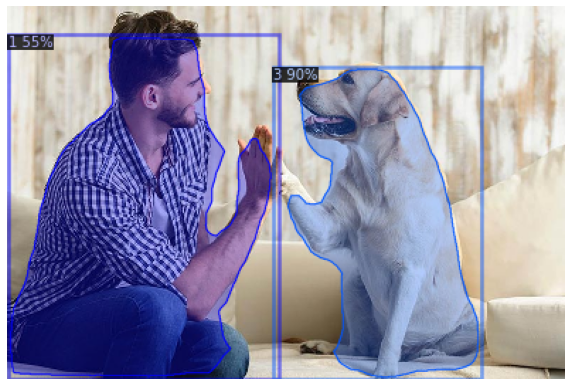

In [7]:
img=cv2.imread('/content/dog-human.jpg')
outputs = predictor(img)
v = Visualizer(img[:, :, ::-1], scale=0.5, metadata=MetadataCatalog.get("dataset_train"), instance_mode=ColorMode.IMAGE_BW)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
show(out.get_image(), sz=10)

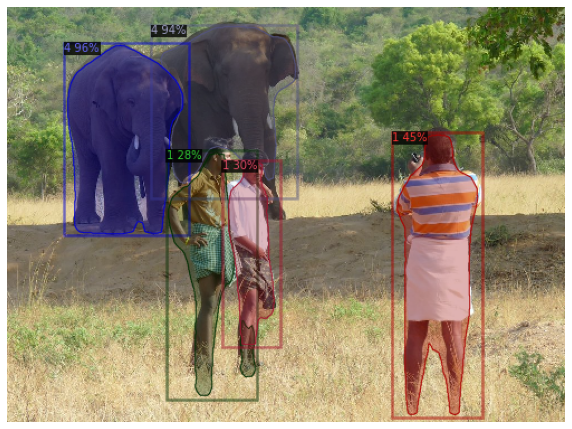

In [8]:
img=cv2.imread('/content/human-elephant.jpg')
outputs = predictor(img)
v = Visualizer(img[:, :, ::-1], scale=0.5, metadata=MetadataCatalog.get("dataset_train"), instance_mode=ColorMode.IMAGE_BW)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
show(out.get_image(), sz=10)

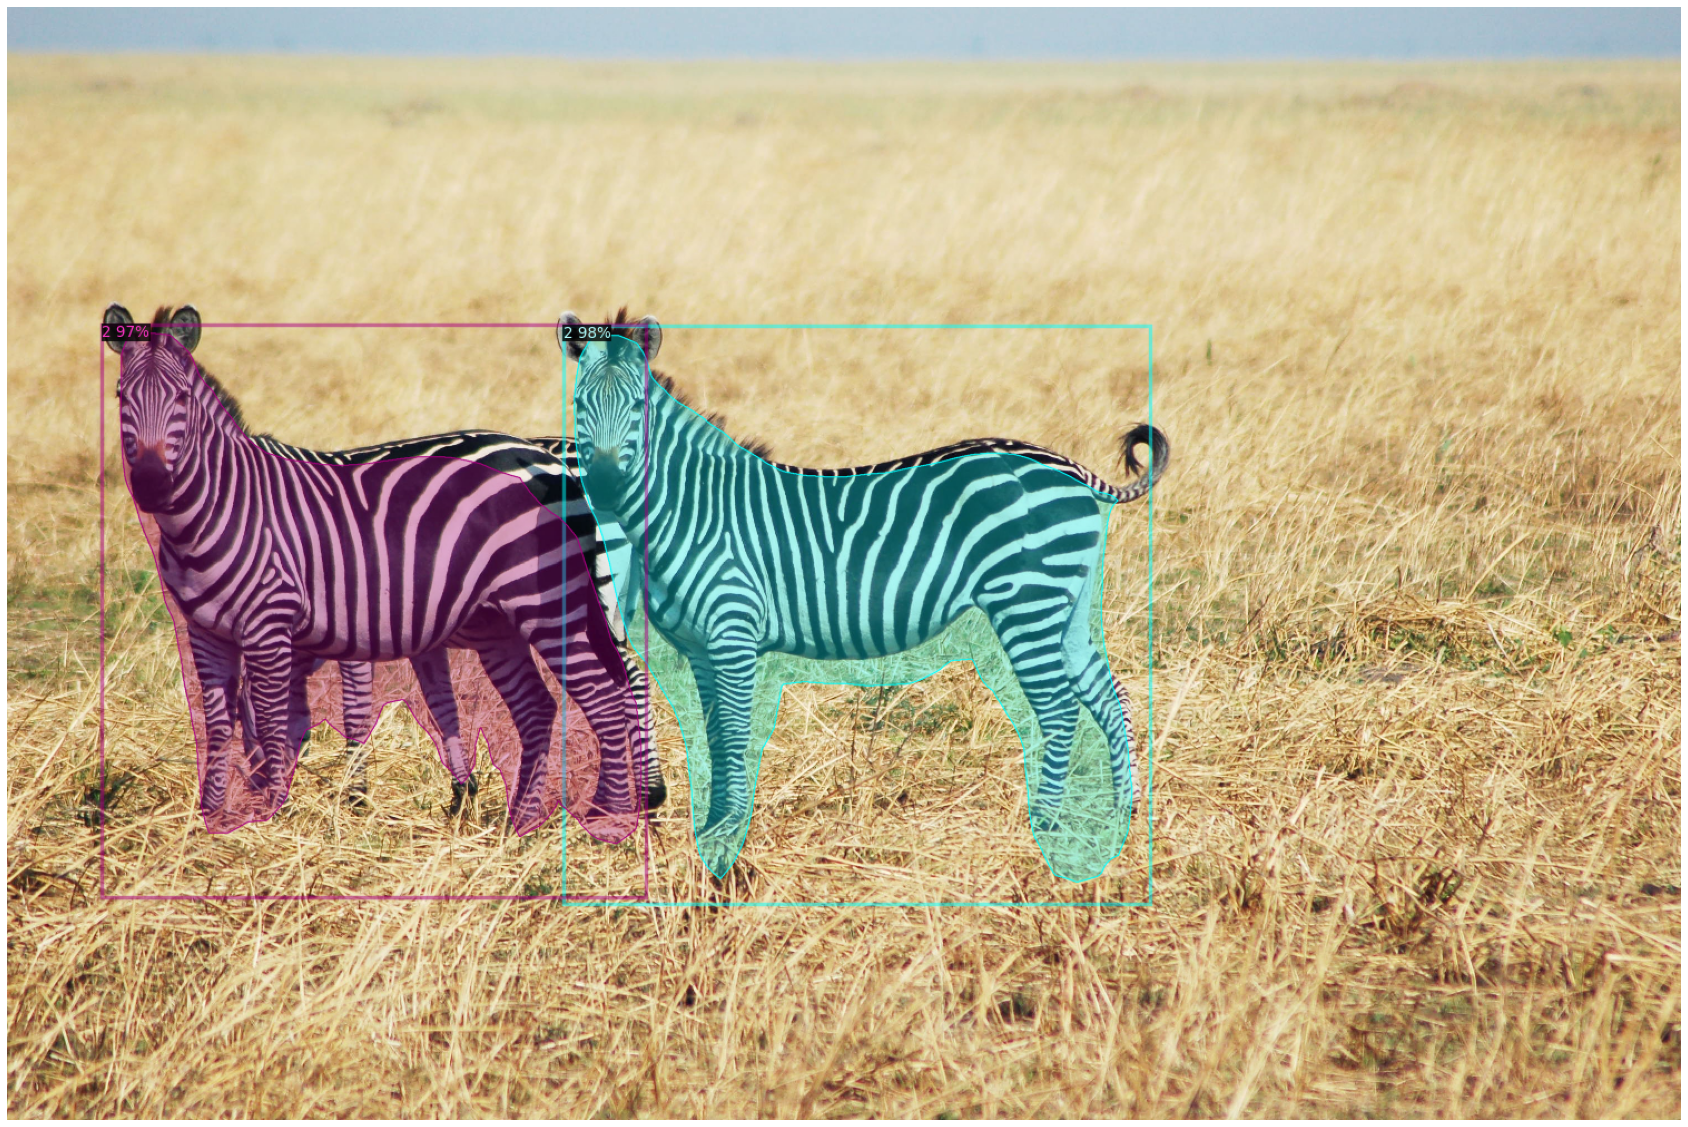

In [9]:
img=cv2.imread('/content/ZebraHP.jpg')
outputs = predictor(img)
v = Visualizer(img[:, :, ::-1], scale=0.5, metadata=MetadataCatalog.get("dataset_train"), instance_mode=ColorMode.IMAGE_BW)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
show(out.get_image(), sz=30)